In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load data and overview 
- Load data and overview some infomation

In [3]:
acc = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')
acc.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [4]:
# Columns basic infomation
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2086 non-null   object 
 1   AUSPRAEGUNG                     2086 non-null   object 
 2   JAHR                            2086 non-null   int64  
 3   MONAT                           2086 non-null   object 
 4   WERT                            2002 non-null   float64
 5   VORJAHRESWERT                   1995 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1910 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 146.8+ KB


In [5]:
# Check NA in each column
acc.isna().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                               84
VORJAHRESWERT                      91
VERAEND_VORMONAT_PROZENT          246
VERAEND_VORJAHRESMONAT_PROZENT    176
ZWOELF_MONATE_MITTELWERT          238
dtype: int64

In [6]:
# Categories count for first column
acc['MONATSZAHL'].value_counts()

Verkehrsunfälle    894
Alkoholunfälle     596
Fluchtunfälle      596
Name: MONATSZAHL, dtype: int64

In [7]:
# Sub-type count
acc['AUSPRAEGUNG'].value_counts()

insgesamt                 894
Verletzte und Getötete    894
mit Personenschäden       298
Name: AUSPRAEGUNG, dtype: int64

In [9]:
acc.tail()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0
2085,Verkehrsunfälle,Verletzte und Getötete,2000,200012,515.0,NaN,-10.90,NaN,588.0


### Filter and format data for visualization

In [5]:
# Filter only valid rows
acc1 = acc[acc.WERT.notna()]

In [6]:
len(acc1), len(acc)

(2002, 2086)

In [7]:
# Filter for only month
acc1 = acc1[acc1.MONAT != 'Summe']
acc1['MONAT'] = acc1['MONAT'].astype(int)
acc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 13 to 2085
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      1848 non-null   object 
 1   AUSPRAEGUNG                     1848 non-null   object 
 2   JAHR                            1848 non-null   int64  
 3   MONAT                           1848 non-null   int64  
 4   WERT                            1848 non-null   float64
 5   VORJAHRESWERT                   1764 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1763 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 144.4+ KB


In [8]:
acc1.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
17,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0


In [9]:
acc1['MONATSZAHL'].value_counts()

Verkehrsunfälle    792
Alkoholunfälle     528
Fluchtunfälle      528
Name: MONATSZAHL, dtype: int64

In [10]:
# Format MONTH as datetime
acc1['MONTH'] = pd.to_datetime(acc1['MONAT'], format='%Y%m')
acc1

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,MONTH
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0,2021-01-01
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0,2021-02-01
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0,2021-03-01
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0,2021-04-01
17,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0,2000-08-01
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0,2000-09-01
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0,2000-10-01
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0,2000-11-01


### Aggregate plot
- Plot for total accidents (insgesamt) by month per category 

In [16]:
df = acc1[acc1.AUSPRAEGUNG == 'insgesamt'][['MONATSZAHL', 'MONTH', 'WERT']]
df.head()

,MONATSZAHL,MONTH,WERT
13,Alkoholunfälle,2021-01-01,16.0
14,Alkoholunfälle,2021-02-01,14.0
15,Alkoholunfälle,2021-03-01,24.0
16,Alkoholunfälle,2021-04-01,16.0
17,Alkoholunfälle,2021-05-01,24.0


In [12]:
df = df.reset_index()
df.head()

,MONATSZAHL,MONTH,WERT
0,Alkoholunfälle,2000-01-01,115.0
1,Alkoholunfälle,2000-02-01,72.0
2,Alkoholunfälle,2000-03-01,91.0
3,Alkoholunfälle,2000-04-01,104.0
4,Alkoholunfälle,2000-05-01,140.0


In [22]:
df.sort_values('MONTH', inplace=True)
df

,MONATSZAHL,MONTH,WERT
286,Alkoholunfälle,2000-01-01,78.0
1478,Verkehrsunfälle,2000-01-01,3448.0
882,Fluchtunfälle,2000-01-01,835.0
287,Alkoholunfälle,2000-02-01,53.0
1479,Verkehrsunfälle,2000-02-01,3181.0
...,...,...,...
1215,Verkehrsunfälle,2021-11-01,3308.0
23,Alkoholunfälle,2021-11-01,33.0
24,Alkoholunfälle,2021-12-01,21.0
1216,Verkehrsunfälle,2021-12-01,2997.0


Text(0.5, 1.0, 'Number of accidents per category over time.')

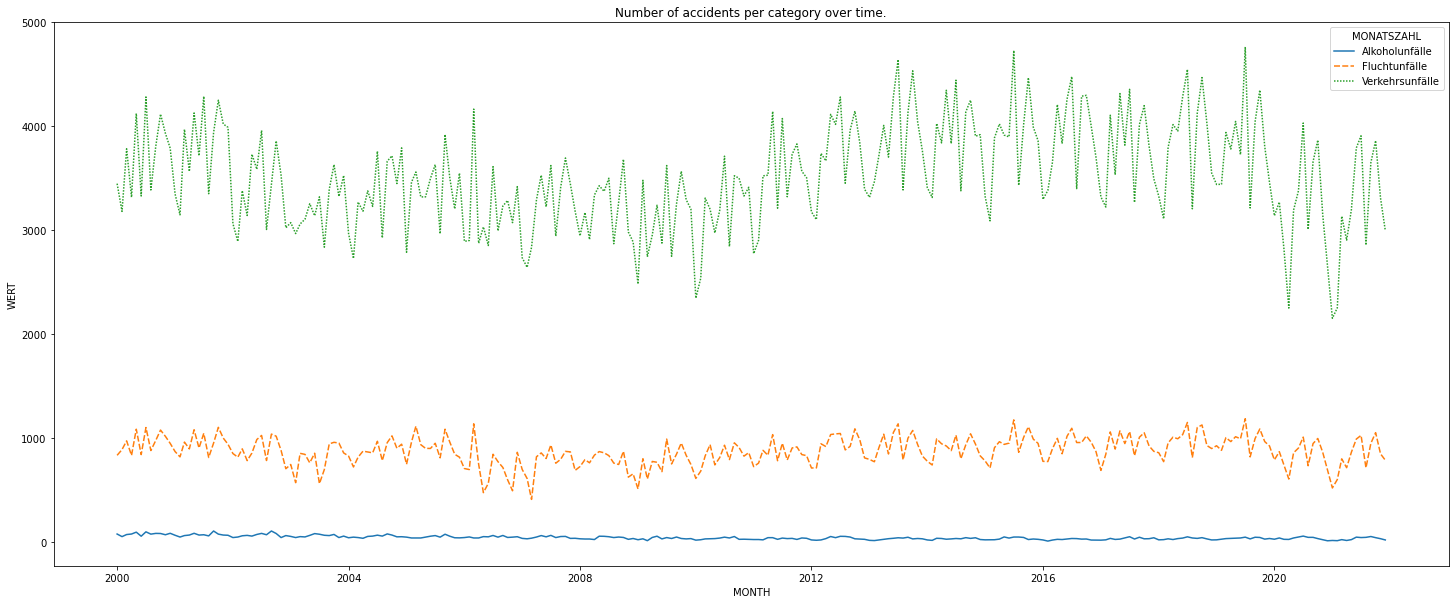

In [19]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=df, x='MONTH', y='WERT', hue='MONATSZAHL', style="MONATSZAHL")
plt.title('Number of accidents per category over time.')

### Plot with plotly
- For nice plots

In [20]:
import plotly.express as px

In [23]:
fig = px.line(df, x="MONTH", y="WERT", color='MONATSZAHL', title='Number of accidents per category over time.')
fig.show()

In [25]:
fig = px.line(df[df.MONATSZAHL == 'Alkoholunfälle'], x="MONTH", y="WERT", title='Number of "Alkoholunfälle" accidents per category over time.')
fig.show()

In [26]:
fig = px.line(df[df.MONATSZAHL == 'Verkehrsunfälle'], x="MONTH", y="WERT", 
              title='Number of "Verkehrsunfälle" accidents per category over time.')
fig.show()

In [27]:
fig = px.line(df[df.MONATSZAHL == 'Fluchtunfälle'], x="MONTH", y="WERT", title='Number of "Fluchtunfälle" accidents per category over time.')
fig.show()